In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = (20,10)


In [3]:
path_to_data = '/mnt/storage/HRV/data_atfer_Nekit_skripts/'
path_to_3d_signal = '/mnt/storage/HRV/3d-signal/'

In [74]:
files

['310405.npy',
 '110270.npy',
 '110280.npy',
 '110303.npy',
 '110307.npy',
 '110314.npy',
 '110318.npy',
 '110357.npy',
 '110477.npy',
 '110520.npy',
 '110552.npy',
 '110579.npy',
 '110664.npy',
 '110700.npy',
 '110723.npy',
 '110760.npy',
 '110784.npy',
 '110788.npy',
 '110797.npy',
 '110806.npy',
 '221381.npy',
 '221382.npy',
 '221383.npy',
 '221384.npy',
 '221385.npy',
 '221386.npy',
 '221387.npy',
 '221390.npy',
 '221392.npy',
 '221393.npy',
 '221394.npy',
 '221395.npy',
 '221398.npy',
 '221399.npy',
 '221407.npy',
 '221412.npy',
 '221413.npy',
 '221415.npy',
 '221417.npy',
 '221331.npy',
 '221335.npy',
 '221337.npy',
 '221340.npy',
 '221342.npy',
 '221344.npy',
 '221350.npy',
 '221351.npy',
 '221352.npy',
 '221358.npy',
 '221361.npy',
 '221367.npy',
 '221368.npy',
 '221370.npy',
 '221373.npy',
 '221376.npy',
 '221377.npy',
 '221378.npy',
 '221379.npy',
 '210295.npy',
 '210300.npy',
 '210308.npy',
 '210316.npy',
 '210320.npy',
 '210326.npy',
 '210334.npy',
 '210358.npy',
 '210360.n

In [75]:
files = os.listdir(path_to_data + 'R-T_code_with_markup/')

for file in files[:1]:
    R_T = np.load(path_to_data + 'R-T_code_with_markup/' + file)
    R = R_T[0]
    T = R_T[1]
    
    filter1 = np.array((T > 200, T < 2000)).all(axis = 0)[:-1]
    filter3 = (R > 10)[:-1]
    filter_all = np.array((filter1, filter3)).all(axis = 0)
    bad_signal = np.array(range(len((R > 10)[:-1])))[~filter_all]
    if len(bad_signal) < 2:
        continue
    if max(bad_signal[1:] - bad_signal[:-1]) < 50:
        print (file, max(bad_signal[1:] - bad_signal[:-1]))

310405.npy 1


In [80]:
bad_signal

array([84923, 84924, 84925, 84926, 84927, 84928, 84929, 84930, 84931,
       84932, 84933, 84934, 84935, 84936, 84937, 84938, 84939, 84940,
       84941, 84942, 84943, 84944, 84945, 84946, 84947, 84948, 84949,
       84950, 84951, 84952, 84953, 84954, 84955, 84956, 84957, 84958,
       84959, 84960, 84961, 84962, 84963, 84964, 84965, 84966, 84967,
       84968, 84969, 84970, 84971, 84972, 84973, 84974, 84975, 84976,
       84977, 84978, 84979, 84980, 84981, 84982, 84983, 84984, 84985,
       84986, 84987, 84988, 84989, 84990, 84991, 84992, 84993, 84994,
       84995, 84996, 84997, 84998, 84999, 85000, 85001, 85002, 85003,
       85004, 85005, 85006, 85007, 85008, 85009, 85010, 85011, 85012,
       85013, 85014, 85015, 85016, 85017, 85018, 85019, 85020, 85021,
       85022, 85023, 85024, 85025, 85026, 85027, 85028, 85029, 85030,
       85031, 85032, 85033, 85034, 85035, 85036, 85037, 85038, 85039,
       85040, 85041, 85042, 85043, 85044, 85045, 85046, 85047, 85048,
       85049, 85050,

In [81]:
R_T = np.load(path_to_data + 'R-T_code_with_markup/' + str(310405) + '.npy')
R = R_T[0]
T = R_T[1]

In [82]:
filter1 = np.array((T > 200, T < 2000)).all(axis = 0)[:-1]
# filter2 = np.array((T[1:]/T[:-1] > 0.8, T[1:]/T[:-1] < 1.2)).all(axis = 0)
filter2 = filter1
filter3 = (R > 10)[:-1]

print (filter1.shape, filter2.shape, filter3.shape)

filter_all = np.array((filter1, filter2, filter3)).all(axis = 0)

(85057,) (85057,) (85057,)


In [83]:
bad_signal = np.array(range(len((R > 10)[:-1])))[~filter_all]

In [73]:
max(bad_signal[1:] - bad_signal[:-1])

30753

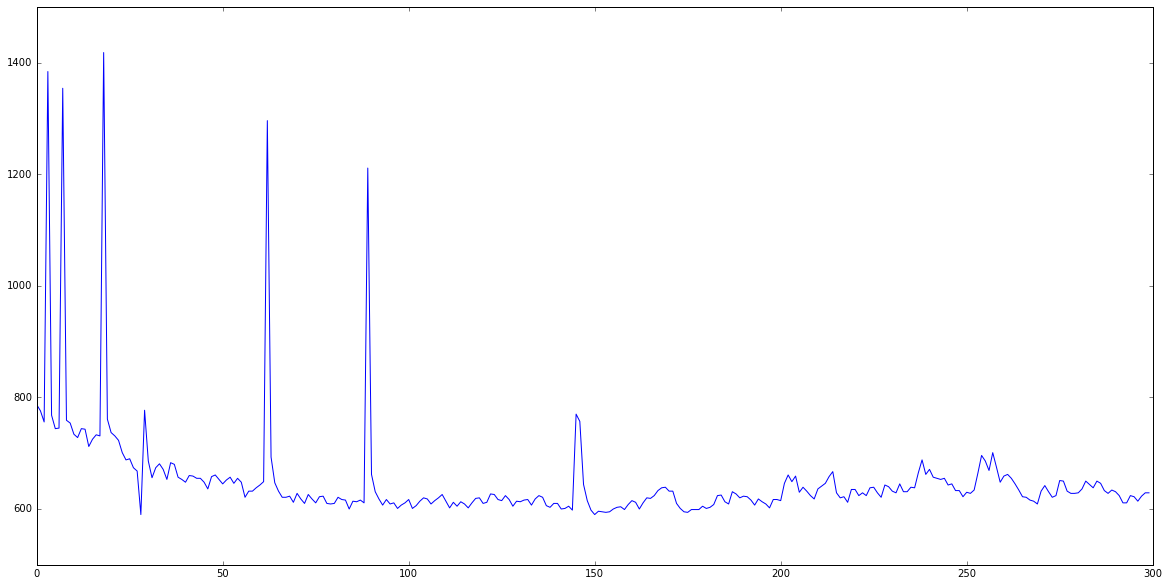

In [77]:
plt.plot(T[:300])

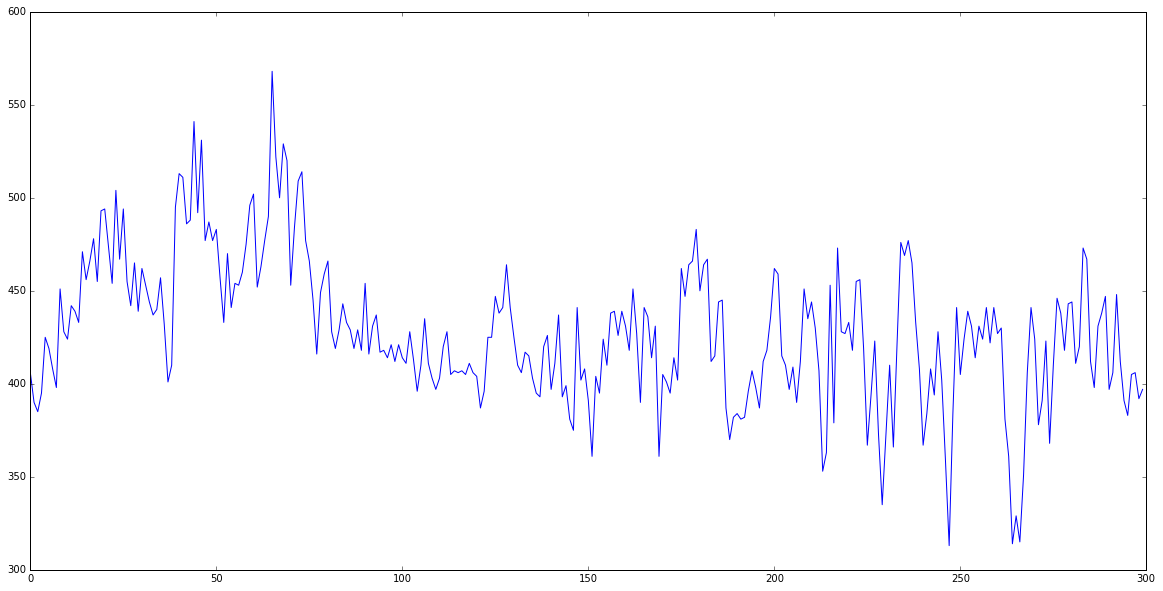

In [78]:
plt.plot(R[:300])

In [53]:
inputfilename = path_to_3d_signal + str(110760) + '.A53'
with open(inputfilename, 'rb') as f:
    vectorized = np.fromfile(f, np.int16)
if inputfilename[-1] == '3':
    data = np.reshape(vectorized, [len(vectorized)/3, 3])
else:
    data = np.reshape(vectorized, [len(vectorized)/2, 2])

In [54]:
inputfilename = path_to_data + 'filtered/' + str(110760) +'_filtered' + '.A53'
with open(inputfilename, 'rb') as f:
    vectorized = np.fromfile(f, np.int16)

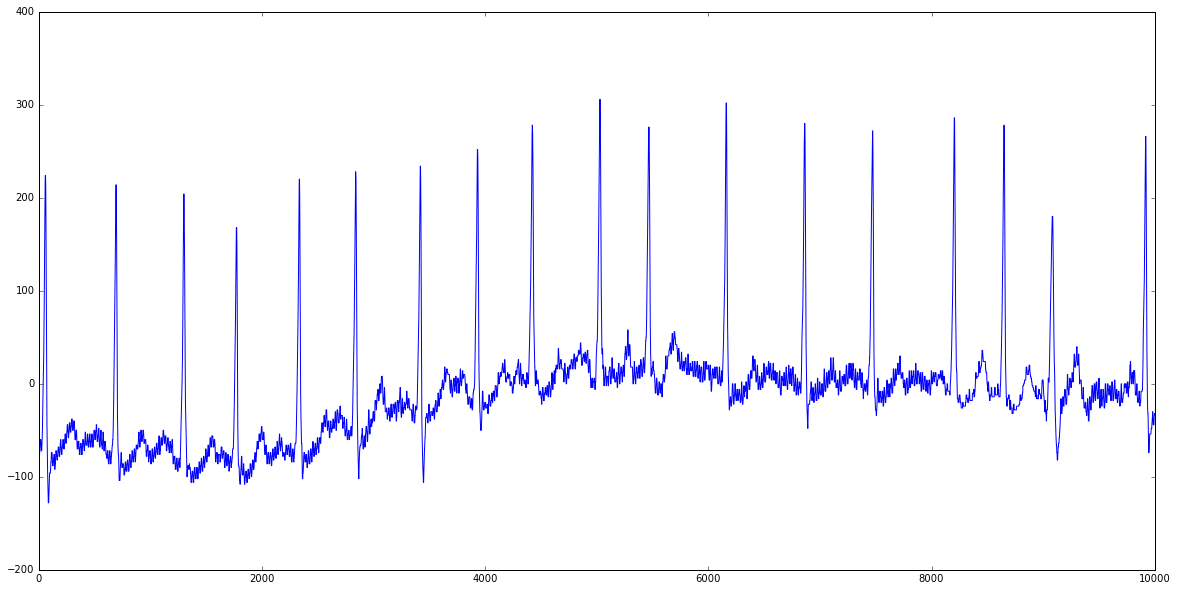

In [55]:
a = data[:, 0]
# a = vectorized
plt.plot(a[:10000])

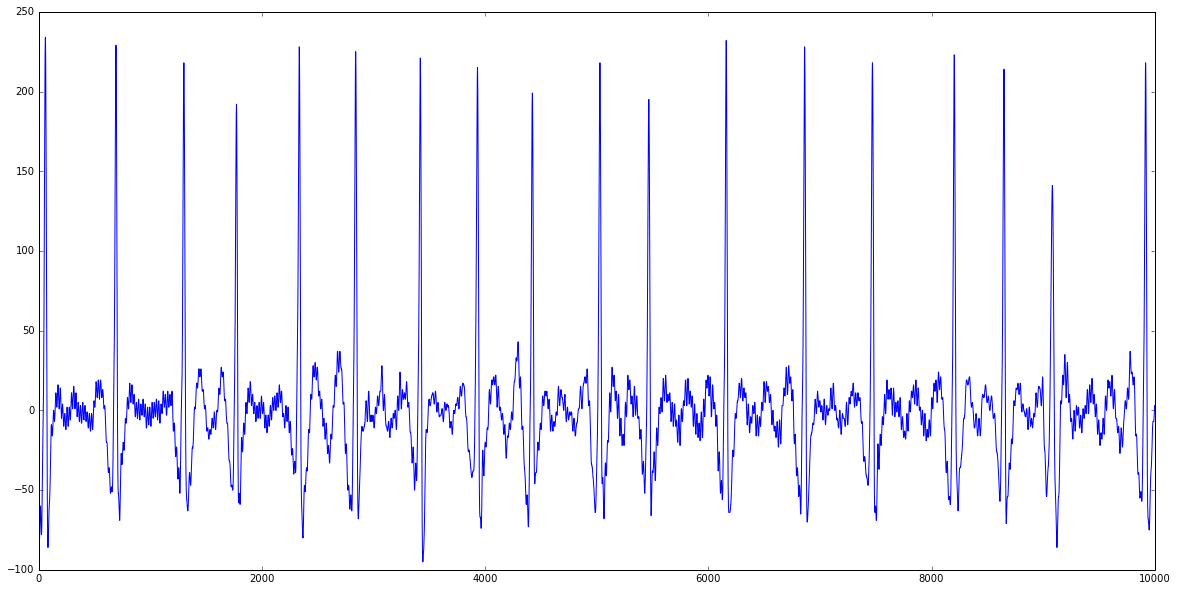

In [57]:
# a = data[:, 0]
b = vectorized
plt.plot(b[:10000])